# Use the original reads, DNA as WT, RNA as KO, check which sequence has lower expression based on RNA expression

### NOTE: don't use data.table function to read csv as table, will lost header info

# HEK293T cell

### 1. Load raw counts, filter and normalize raw data, keep interger only

In [47]:
# Load the necessary library
library(dplyr)

# Read the CSV file
counts <- read.csv("../counts-aso.csv")

# Select only columns from the third onward
numeric_data <- counts[, 3:ncol(counts)]

# Convert the numeric columns to integers (if needed after calculations)
numeric_data <- apply(numeric_data, 2, function(x) as.integer(x))

# Add back the first two columns (gene name and others)
data <- cbind(counts[, 1:2], numeric_data)

# View the first few rows of the result
head(data)

,Seq,Name,hek.gDNA1,hek.gDNA2,hek.gDNA3,hek.RNA1,hek.RNA2,hek.RNA3,sk.gDNA1,sk.gDNA2,sk.gDNA3,sk.RNA1,sk.RNA2,sk.RNA3,aso.lib1,aso.lib2
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ATTATTCATACTAGGGTTTGACCAACAAAG,AAGAB|ENST00000261880.10|1,2931,2511,3964,2265,2164,2430,3041,2212,1318,1660,1599,2036,3000,2635
2,TTAGTTTTTAGTAGGAGGTTAAGGAGAAAT,AAGAB|ENST00000261880.10|2,2201,1890,3436,2267,2269,2796,3213,2573,1350,1891,1828,1708,3358,2859
3,TAAATCTCAGAGGTCTGTGTGATTTACTCA,AAGAB|ENST00000261880.10|3,4923,4555,6008,6560,6474,6490,6847,5955,6049,3490,3270,3675,7867,6851
4,ATTTGGGTTTTCTCCATTCAAGGAGCTTGT,AAGAB|ENST00000261880.10|4,1870,1612,2527,1797,1965,2236,2174,1716,1201,1500,1300,1170,2041,1822
5,GAAAATGCCTCTGGGCATTCTTTTGAAGTA,AAGAB|ENST00000261880.10|5,3262,2828,4033,2910,3202,3289,3404,2529,2081,2491,2280,2227,3110,2710
6,ACTGAGTTGTGGGGGATATGTTGTATGTTA,AAGAB|ENST00000261880.10|6,3506,3155,4002,3038,2896,2727,4480,3821,4134,2115,1956,2473,5170,4589


In [48]:
# prepare metadata DataFrame
sample_info <- data.frame(
   sample = paste(rep(c("hek_gDNA", "hek_RNA"), each = 3), 1:3, sep = ""),
   condition = rep(c("hek_gDNA", "hek_RNA"), each = 3),
   row.names = paste(rep(c("hek_gDNA", "hek_RNA"), each = 3), 1:3, sep = "")
)

In [49]:
# Read a CSV file in R and only use specific columns 

# drop columns 2:8
data1 <- data[, -c(15:16)]
selected_data <- data1[, 2:8]

# View the selected columns
print(head(selected_data))
print(colnames(selected_data))

                        Name hek.gDNA1 hek.gDNA2 hek.gDNA3 hek.RNA1 hek.RNA2
1 AAGAB|ENST00000261880.10|1      2931      2511      3964     2265     2164
2 AAGAB|ENST00000261880.10|2      2201      1890      3436     2267     2269
3 AAGAB|ENST00000261880.10|3      4923      4555      6008     6560     6474
4 AAGAB|ENST00000261880.10|4      1870      1612      2527     1797     1965
5 AAGAB|ENST00000261880.10|5      3262      2828      4033     2910     3202
6 AAGAB|ENST00000261880.10|6      3506      3155      4002     3038     2896
  hek.RNA3
1     2430
2     2796
3     6490
4     2236
5     3289
6     2727
[1] "Name"      "hek.gDNA1" "hek.gDNA2" "hek.gDNA3" "hek.RNA1"  "hek.RNA2" 
[7] "hek.RNA3" 


In [50]:
mat <- selected_data[,-1]
rownames(mat) <- selected_data[,1]
head(mat)
dim(sample_info)

,hek.gDNA1,hek.gDNA2,hek.gDNA3,hek.RNA1,hek.RNA2,hek.RNA3
,<int>,<int>,<int>,<int>,<int>,<int>
AAGAB|ENST00000261880.10|1,2931,2511,3964,2265,2164,2430
AAGAB|ENST00000261880.10|2,2201,1890,3436,2267,2269,2796
AAGAB|ENST00000261880.10|3,4923,4555,6008,6560,6474,6490
AAGAB|ENST00000261880.10|4,1870,1612,2527,1797,1965,2236
AAGAB|ENST00000261880.10|5,3262,2828,4033,2910,3202,3289
AAGAB|ENST00000261880.10|6,3506,3155,4002,3038,2896,2727


[1] 6 2

In [51]:
dim(mat)
dim(sample_info)


[1] 12000     6

[1] 6 2

In [52]:
colnames(mat)
rownames(sample_info)

[1] "hek.gDNA1" "hek.gDNA2" "hek.gDNA3" "hek.RNA1"  "hek.RNA2"  "hek.RNA3"

[1] "hek_gDNA1" "hek_gDNA2" "hek_gDNA3" "hek_RNA1"  "hek_RNA2"  "hek_RNA3"

In [53]:
colnames(mat) <- rownames(sample_info)

In [54]:
colnames(mat)
rownames(sample_info)

[1] "hek_gDNA1" "hek_gDNA2" "hek_gDNA3" "hek_RNA1"  "hek_RNA2"  "hek_RNA3"

[1] "hek_gDNA1" "hek_gDNA2" "hek_gDNA3" "hek_RNA1"  "hek_RNA2"  "hek_RNA3"

In [55]:
# create the DESeqDataSet
library(DESeq2)

# Create a DESeqDataSet
dds <- DESeqDataSetFromMatrix(countData = mat,
                              colData = sample_info,
                              design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [56]:
# Run the differential expression analysis
dds <- DESeq(dds)

# Extract results
res <- results(dds)

# Write results to a CSV file
write.csv(as.data.frame(res), "hek-dna-rna.csv")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [57]:
# Get the significant changed gene and export

dif_gene <- subset(res, padj < 0.05 & abs(log2FoldChange) >1)
dim(dif_gene)
head(dif_gene)

# Export the DEG results
write.csv(dif_gene, file="DEG_RNA_vs_DNA_HEK.csv")


[1] 4507    6

log2 fold change (MLE): condition hek RNA vs hek gDNA 
Wald test p-value: condition hek RNA vs hek gDNA 
DataFrame with 6 rows and 6 columns
                             baseMean log2FoldChange     lfcSE      stat
                            <numeric>      <numeric> <numeric> <numeric>
AAGAB|ENST00000261880.10|13   548.313       -3.29343 0.1502763  -21.9158
AAGAB|ENST00000261880.10|14  1951.261       -3.60753 0.1081682  -33.3511
ABCA7|ENST00000263094.11|1   1939.946        1.20455 0.1030380   11.6903
ABCC6|ENST00000205557.12|1   8709.543        1.71516 0.1153757   14.8659
ABCC9|ENST00000261200.9|1    1237.812       -1.11996 0.0951932  -11.7651
ABCC9|ENST00000261200.9|3     656.080       -1.96165 0.1210922  -16.1996
                                  pvalue         padj
                               <numeric>    <numeric>
AAGAB|ENST00000261880.10|13 1.83634e-106 3.81272e-105
AAGAB|ENST00000261880.10|14 7.01446e-244 1.23578e-241
ABCA7|ENST00000263094.11|1   1.42863e-31  5.30862e-31
ABCC6

In [58]:
# combine the results
resdata <- merge(as.data.frame(res), as.data.frame(counts(dds, normalize=TRUE)), by="row.names", sort=FALSE)
# write.table(resdata, file = "DESeq2_GROUp_genes_hek.txt", sep = '\t', quote=F, row.names = F)

In [90]:


# Filter out rows with NA values in 'padj' and 'log2FoldChange'
resdata <- resdata[!is.na(resdata$padj) & !is.na(resdata$log2FoldChange), ]

# Create 'select_change' based on absolute log2 fold change (threshold: >= 1)
resdata$select_change <- ifelse(abs(resdata$log2FoldChange) >= 1, 'y', 'n')

# Create 'select_pvalue' based on adjusted p-value (threshold: < 0.05)
resdata$select_pvalue <- ifelse(resdata$padj < 0.05, 'y', 'n')

# Combine 'select_change' and 'select_pvalue' into a single 'select' column
resdata$select <- with(resdata, paste(select_change, select_pvalue, sep = ''))

# Define factor levels and descriptive labels for 'select'
resdata$select <- factor(resdata$select, 
                         levels = c('nn', 'ny', 'yn', 'yy'),
                         labels = c('p >= 0.05, FC < 1', 
                                    'p < 0.05, FC < 1', 
                                    'p >= 0.05, FC >= 1', 
                                    'p < 0.05, FC >= 1'))

# Check the structure of the 'select' column
str(resdata$select)

# Display the distribution of factor levels in 'select'
table(resdata$select)


 Factor w/ 4 levels "p >= 0.05, FC < 1",..: 2 1 1 2 2 1 2 4 4 1 ...



 p >= 0.05, FC < 1   p < 0.05, FC < 1 p >= 0.05, FC >= 1  p < 0.05, FC >= 1 
              2407               3482                 61               6027 

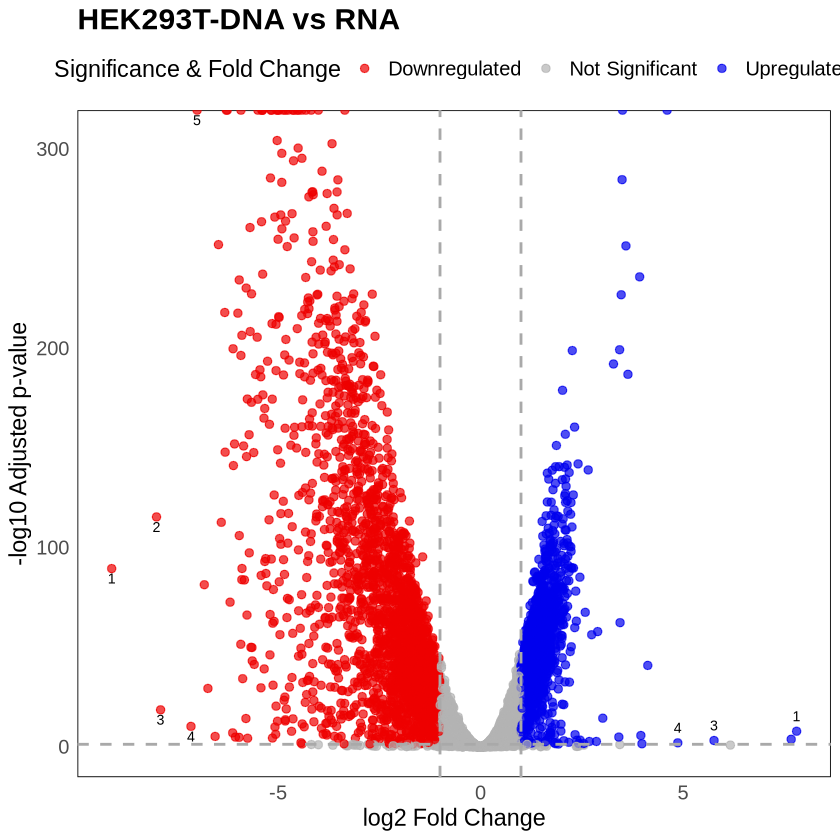

In [60]:
library(ggplot2)
library(dplyr)

# Create a new column 'color_group' based on log2FoldChange and padj
resdata <- resdata %>%
  mutate(color_group = case_when(
    log2FoldChange >= 1 & padj < 0.05 ~ 'Upregulated',     # Upregulated genes (log2FC >= 1, padj < 0.05)
    log2FoldChange <= -1 & padj < 0.05 ~ 'Downregulated',  # Downregulated genes (log2FC <= -1, padj < 0.05)
    TRUE ~ 'Not Significant'                               # Not significant genes
  ))

# Extract top 5 upregulated genes by log2FoldChange
top_upregulated <- resdata %>%
  filter(color_group == 'Upregulated') %>%
  arrange(desc(log2FoldChange)) %>%
  head(5)

# Extract top 5 downregulated genes by log2FoldChange
top_downregulated <- resdata %>%
  filter(color_group == 'Downregulated') %>%
  arrange(log2FoldChange) %>%
  head(5)

# Plotting the volcano plot
volcano_plot_pvalue <- ggplot(resdata, aes(x = log2FoldChange, y = -log10(padj))) +
  
  # Points colored by 'color_group'
  geom_point(aes(color = color_group), alpha = 0.7, size = 2) +
  
  # Define colors for upregulated, downregulated, and not significant
  scale_color_manual(values = c('Upregulated' = 'blue2', 'Downregulated' = 'red2', 'Not Significant' = 'gray70')) +
  
  # Add vertical and horizontal lines for fold-change and p-value cutoffs
  geom_vline(xintercept = c(-1, 1), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  geom_hline(yintercept = -log10(0.05), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  
  # Add labels for the top 5 upregulated and downregulated genes
  geom_text(data = top_upregulated, aes(label = row.names(top_upregulated)), 
            size = 3, vjust = -1, hjust = 0.5, check_overlap = TRUE) +
  geom_text(data = top_downregulated, aes(label = row.names(top_downregulated)), 
            size = 3, vjust = 1.5, hjust = 0.5, check_overlap = TRUE) +
  
  # Improve titles, axis labels, and legend
  labs(
    title = 'HEK293T-DNA vs RNA',
    x = 'log2 Fold Change',
    y = '-log10 Adjusted p-value',
    color = 'Significance & Fold Change'
  ) +
  
  # Theme adjustments for clarity
  theme_minimal() +
  theme(
    panel.grid = element_blank(),  # Remove grid lines
    panel.background = element_rect(color = 'black', fill = 'transparent'),
    plot.title = element_text(size = 18, face = 'bold'),  # Larger plot title
    axis.title.x = element_text(size = 14),  # X-axis title size
    axis.title.y = element_text(size = 14),  # Y-axis title size
    axis.text.x = element_text(size = 12),   # X-axis tick labels size
    axis.text.y = element_text(size = 12),   # Y-axis tick labels size
    legend.title = element_text(size = 14),  # Legend title size
    legend.text = element_text(size = 12),   # Legend text size
    legend.position = "top"                 # Legend at the top
  )

# Print the plot
print(volcano_plot_pvalue)


## change pvalue and fold change

In [76]:
# Filter data for p-value < 0.05 and fold change <= -2
filtered_data <- resdata[resdata$padj < 0.05 & resdata$log2FoldChange  <= -1, ]

# Count the number of rows that meet the conditions
num_significant <- nrow(filtered_data)

# Print the result
print(num_significant)

[1] 2295


# SK cell

In [78]:
# prepare metadata DataFrame
sample_info <- data.frame(
   sample = paste(rep(c("sk_g", "sk_r"), each = 3), 1:3, sep = ""),
   condition = rep(c("sk_g", "sk_r"), each = 3),
   row.names = paste(rep(c("sk_g", "sk_r"), each = 3), 1:3, sep = "")
)

In [79]:
# Load the necessary library
library(dplyr)

# Read the CSV file
counts <- read.csv("../counts-aso.csv")

# Select only columns from the third onward
numeric_data <- counts[, 3:ncol(counts)]

# Convert the numeric columns to integers (if needed after calculations)
numeric_data <- apply(numeric_data, 2, function(x) as.integer(x))

# Add back the first two columns (gene name and others)
data <- cbind(counts[, 1:2], numeric_data)

# View the first few rows of the result
head(data)

,Seq,Name,hek.gDNA1,hek.gDNA2,hek.gDNA3,hek.RNA1,hek.RNA2,hek.RNA3,sk.gDNA1,sk.gDNA2,sk.gDNA3,sk.RNA1,sk.RNA2,sk.RNA3,aso.lib1,aso.lib2
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ATTATTCATACTAGGGTTTGACCAACAAAG,AAGAB|ENST00000261880.10|1,2931,2511,3964,2265,2164,2430,3041,2212,1318,1660,1599,2036,3000,2635
2,TTAGTTTTTAGTAGGAGGTTAAGGAGAAAT,AAGAB|ENST00000261880.10|2,2201,1890,3436,2267,2269,2796,3213,2573,1350,1891,1828,1708,3358,2859
3,TAAATCTCAGAGGTCTGTGTGATTTACTCA,AAGAB|ENST00000261880.10|3,4923,4555,6008,6560,6474,6490,6847,5955,6049,3490,3270,3675,7867,6851
4,ATTTGGGTTTTCTCCATTCAAGGAGCTTGT,AAGAB|ENST00000261880.10|4,1870,1612,2527,1797,1965,2236,2174,1716,1201,1500,1300,1170,2041,1822
5,GAAAATGCCTCTGGGCATTCTTTTGAAGTA,AAGAB|ENST00000261880.10|5,3262,2828,4033,2910,3202,3289,3404,2529,2081,2491,2280,2227,3110,2710
6,ACTGAGTTGTGGGGGATATGTTGTATGTTA,AAGAB|ENST00000261880.10|6,3506,3155,4002,3038,2896,2727,4480,3821,4134,2115,1956,2473,5170,4589


In [81]:
# Read a CSV file in R and only use specific columns 

# Select columns 2 to 8
selected_data <- data[, c(2, 9:14)]

# View the selected columns
print(head(selected_data))
print(colnames(selected_data))

                        Name sk.gDNA1 sk.gDNA2 sk.gDNA3 sk.RNA1 sk.RNA2 sk.RNA3
1 AAGAB|ENST00000261880.10|1     3041     2212     1318    1660    1599    2036
2 AAGAB|ENST00000261880.10|2     3213     2573     1350    1891    1828    1708
3 AAGAB|ENST00000261880.10|3     6847     5955     6049    3490    3270    3675
4 AAGAB|ENST00000261880.10|4     2174     1716     1201    1500    1300    1170
5 AAGAB|ENST00000261880.10|5     3404     2529     2081    2491    2280    2227
6 AAGAB|ENST00000261880.10|6     4480     3821     4134    2115    1956    2473
[1] "Name"     "sk.gDNA1" "sk.gDNA2" "sk.gDNA3" "sk.RNA1"  "sk.RNA2"  "sk.RNA3" 


In [82]:
mat <- selected_data[,-1]
rownames(mat) <- selected_data[,1]
head(mat)
dim(sample_info)

,sk.gDNA1,sk.gDNA2,sk.gDNA3,sk.RNA1,sk.RNA2,sk.RNA3
,<int>,<int>,<int>,<int>,<int>,<int>
AAGAB|ENST00000261880.10|1,3041,2212,1318,1660,1599,2036
AAGAB|ENST00000261880.10|2,3213,2573,1350,1891,1828,1708
AAGAB|ENST00000261880.10|3,6847,5955,6049,3490,3270,3675
AAGAB|ENST00000261880.10|4,2174,1716,1201,1500,1300,1170
AAGAB|ENST00000261880.10|5,3404,2529,2081,2491,2280,2227
AAGAB|ENST00000261880.10|6,4480,3821,4134,2115,1956,2473


[1] 6 2

In [83]:
colnames(mat)
rownames(sample_info)

[1] "sk.gDNA1" "sk.gDNA2" "sk.gDNA3" "sk.RNA1"  "sk.RNA2"  "sk.RNA3"

[1] "sk_g1" "sk_g2" "sk_g3" "sk_r1" "sk_r2" "sk_r3"

In [84]:
colnames(mat) <- rownames(sample_info)

In [85]:
colnames(mat)
rownames(sample_info)

[1] "sk_g1" "sk_g2" "sk_g3" "sk_r1" "sk_r2" "sk_r3"

[1] "sk_g1" "sk_g2" "sk_g3" "sk_r1" "sk_r2" "sk_r3"

In [86]:
# create the DESeqDataSet
library(DESeq2)

# Create a DESeqDataSet
dds <- DESeqDataSetFromMatrix(countData = mat,
                              colData = sample_info,
                              design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [87]:
# Run the differential expression analysis
dds <- DESeq(dds)

# Extract results
res <- results(dds)

# Write results to a CSV file
write.csv(as.data.frame(res), "sk-dna-rna.csv")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [88]:
# Get the significant changed gene and export

dif_gene <- subset(res, padj < 0.05 & abs(log2FoldChange) >1 )
dim(dif_gene)
head(dif_gene)

# Export the DEG results
write.csv(dif_gene, file="DEG_RNA_vs_DNA_SK.csv")

[1] 6027    6

log2 fold change (MLE): condition sk r vs sk g 
Wald test p-value: condition sk r vs sk g 
DataFrame with 6 rows and 6 columns
                             baseMean log2FoldChange     lfcSE      stat
                            <numeric>      <numeric> <numeric> <numeric>
AAGAB|ENST00000261880.10|8  11849.801        2.32186  0.169418  13.70488
AAGAB|ENST00000261880.10|9   2784.435       -1.76822  0.149902 -11.79584
AAGAB|ENST00000261880.10|13   218.521       -3.07823  0.281866 -10.92090
AAGAB|ENST00000261880.10|14  1181.496       -3.86380  0.172091 -22.45208
ABCA4|ENST00000370225.4|2    1047.989       -1.30172  0.147747  -8.81042
ABCC6|ENST00000205557.12|1  17457.597        1.84455  0.390481   4.72380
                                  pvalue         padj
                               <numeric>    <numeric>
AAGAB|ENST00000261880.10|8   9.49227e-43  8.62587e-42
AAGAB|ENST00000261880.10|9   4.10095e-32  2.56620e-31
AAGAB|ENST00000261880.10|13  9.15842e-28  4.88164e-27
AAGAB|ENST000002618

In [89]:

# combine the results
resdata <- merge(as.data.frame(res), as.data.frame(counts(dds, normalize=TRUE)), by="row.names", sort=FALSE)
write.table(resdata, file = "DESeq2_GROUp_genes_sk.txt", sep = '\t', quote=F, row.names = F)

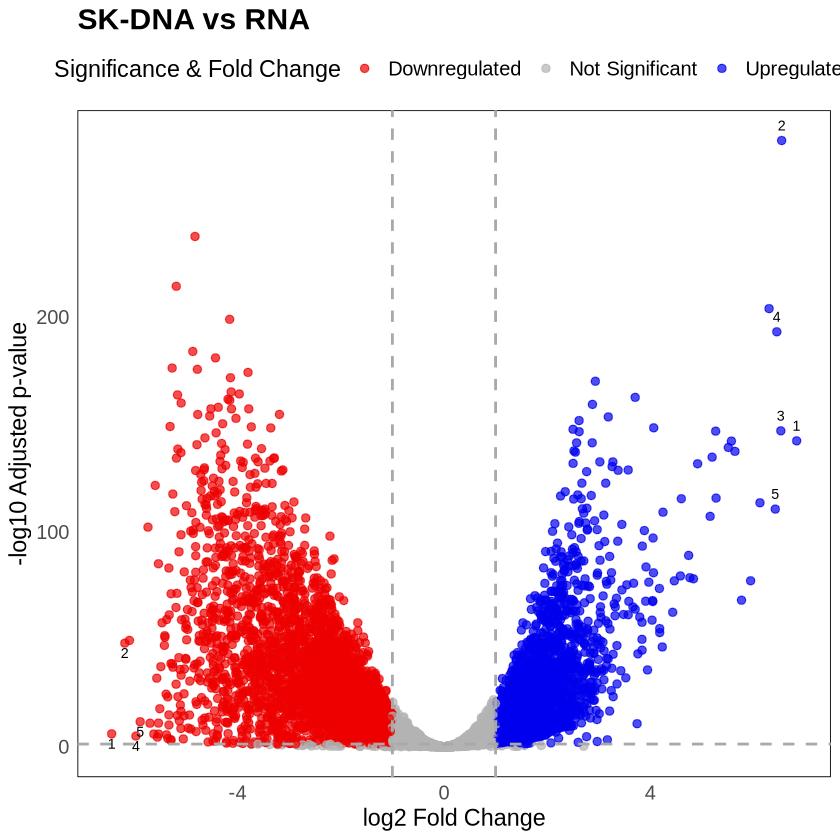

In [91]:
library(ggplot2)
library(dplyr)

# Create a new column 'color_group' based on log2FoldChange and padj
resdata <- resdata %>%
  mutate(color_group = case_when(
    log2FoldChange >= 1 & padj < 0.05 ~ 'Upregulated',     # Upregulated genes (log2FC >= 1, padj < 0.05)
    log2FoldChange <= -1 & padj < 0.05 ~ 'Downregulated',  # Downregulated genes (log2FC <= -1, padj < 0.05)
    TRUE ~ 'Not Significant'                               # Not significant genes
  ))

# Extract top 5 upregulated genes by log2FoldChange
top_upregulated <- resdata %>%
  filter(color_group == 'Upregulated') %>%
  arrange(desc(log2FoldChange)) %>%
  head(5)

# Extract top 5 downregulated genes by log2FoldChange
top_downregulated <- resdata %>%
  filter(color_group == 'Downregulated') %>%
  arrange(log2FoldChange) %>%
  head(5)

# Plotting the volcano plot
volcano_plot_pvalue <- ggplot(resdata, aes(x = log2FoldChange, y = -log10(padj))) +
  
  # Points colored by 'color_group'
  geom_point(aes(color = color_group), alpha = 0.7, size = 2) +
  
  # Define colors for upregulated, downregulated, and not significant
  scale_color_manual(values = c('Upregulated' = 'blue2', 'Downregulated' = 'red2', 'Not Significant' = 'gray70')) +
  
  # Add vertical and horizontal lines for fold-change and p-value cutoffs
  geom_vline(xintercept = c(-1, 1), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  geom_hline(yintercept = -log10(0.05), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  
  # Add labels for the top 5 upregulated and downregulated genes
  geom_text(data = top_upregulated, aes(label = row.names(top_upregulated)), 
            size = 3, vjust = -1, hjust = 0.5, check_overlap = TRUE) +
  geom_text(data = top_downregulated, aes(label = row.names(top_downregulated)), 
            size = 3, vjust = 1.5, hjust = 0.5, check_overlap = TRUE) +
  
  # Improve titles, axis labels, and legend
  labs(
    title = 'SK-DNA vs RNA',
    x = 'log2 Fold Change',
    y = '-log10 Adjusted p-value',
    color = 'Significance & Fold Change'
  ) +
  
  # Theme adjustments for clarity
  theme_minimal() +
  theme(
    panel.grid = element_blank(),  # Remove grid lines
    panel.background = element_rect(color = 'black', fill = 'transparent'),
    plot.title = element_text(size = 18, face = 'bold'),  # Larger plot title
    axis.title.x = element_text(size = 14),  # X-axis title size
    axis.title.y = element_text(size = 14),  # Y-axis title size
    axis.text.x = element_text(size = 12),   # X-axis tick labels size
    axis.text.y = element_text(size = 12),   # Y-axis tick labels size
    legend.title = element_text(size = 14),  # Legend title size
    legend.text = element_text(size = 12),   # Legend text size
    legend.position = "top"                 # Legend at the top
  )

# Print the plot
print(volcano_plot_pvalue)


In [93]:
# Filter data for p-value < 0.05 and fold change <= -2
filtered_data <- resdata[resdata$padj < 0.05 & resdata$log2FoldChange <= -1, ]

# Count the number of rows that meet the conditions
num_significant <- nrow(filtered_data)

# Print the result
print(num_significant)

[1] 3291


In [75]:
library(DESeq2)
library(ggplot2)

# Define the genes of interest
genes_of_interest <- c("ZNF462|ENST00000277225.10|13", "FGF10|ENST00000264664.5|23", "SGCE|ENST00000648936.2|2", "COL1A2|ENST00000297268.11|2")

# Initialize an empty data frame to store results
all_counts <- data.frame()

# Loop through genes and extract counts
for (gene in genes_of_interest) {
  gene_data <- plotCounts(dds, gene = gene, intgroup = "condition", returnData = TRUE)
  gene_data$gene_id <- gene  # Add a column for gene IDs
  all_counts <- rbind(all_counts, gene_data)  # Combine data
}

# View the combined data
head(all_counts)

# Extract only the first part (MECP2)
all_counts$gene_id <- sub("\\|.*", "", all_counts$gene_id)

# Plot using ggplot2
ggplot(all_counts, aes(x = gene_id, y = count, color = condition)) +
  geom_jitter(width = 0.2, height = 0) +
  geom_boxplot(aes(fill = condition), alpha = 0.2, outlier.shape = NA) +
  scale_y_log10() +  # Log scale for better visualization
  labs(title = "Normalized Counts by Gene ID",
       x = "Gene ID",
       y = "Normalized Counts") +
  theme_minimal() +
  theme(legend.position = "top")


ERROR: Error in counts(dds, normalized = normalized, replaced = replaced)[gene, : subscript out of bounds


In [30]:
library(DESeq2)
library(ggplot2)

# Define the genes of interest
genes_of_interest <- c("MECP2|ENST00000453960.7|63", "MECP2|ENST00000453960.7|64", "SNCA|ENST00000394991.8|3", "SALL1|ENST00000251020.9|5")

# Initialize an empty data frame to store results
all_counts <- data.frame()

# Loop through genes and extract counts
for (gene in genes_of_interest) {
  gene_data <- plotCounts(dds, gene = gene, intgroup = "condition", returnData = TRUE)
  gene_data$gene_id <- gene  # Add a column for gene IDs
  all_counts <- rbind(all_counts, gene_data)  # Combine data
}

# View the combined data
head(all_counts)

# Extract only the first part 
# all_counts$gene_id <- sub("\\|.*", "", all_counts$gene_id)

# Plot using ggplot2
ggplot(all_counts, aes(x = gene_id, y = count, color = condition)) +
  geom_jitter(width = 0.2, height = 0) +
  geom_boxplot(aes(fill = condition), alpha = 0.2, outlier.shape = NA) +
  scale_y_log10() +  # Log scale for better visualization
  labs(title = "Normalized Counts by Gene ID",
       x = "Gene ID",
       y = "Normalized Counts") +
  theme_minimal() +
  theme(legend.position = "top")

ERROR: Error in counts(dds, normalized = normalized, replaced = replaced)[gene, : subscript out of bounds


## Compare HEK and SK DNA

In [65]:
# prepare metadata DataFrame
sample_info <- data.frame(
   sample = paste(rep(c("hek_g", "sk_g"), each = 3), 1:3, sep = ""),
   condition = rep(c("hek_g", "sk_g"), each = 3),
   row.names = paste(rep(c("hek_g", "sk_g"), each = 3), 1:3, sep = "")
)

In [66]:
# Load the necessary library
library(dplyr)
# Read the CSV file
counts <- read.csv("../counts_norm.csv")

# Select only columns from the third onward
numeric_data <- counts[, 3:ncol(counts)]

# Convert the numeric columns to integers (if needed after calculations)
numeric_data <- apply(numeric_data, 2, function(x) as.integer(x))

# Add back the first two columns (gene name and others)
data <- cbind(counts[, 1:2], numeric_data)

# View the first few rows of the result
head(data)

# drop columns 2:8
data1 <- data[, -c(15:16)]
selected_data <- data1[, c(2:5, 9:11)]

# View the selected columns
print(head(selected_data))
print(colnames(selected_data))

,Seq,Name,hek.gDNA1,hek.gDNA2,hek.gDNA3,hek.RNA1,hek.RNA2,hek.RNA3,sk.gDNA1,sk.gDNA2,sk.gDNA3,sk.RNA1,sk.RNA2,sk.RNA3,aso.lib1,aso.lib2
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ATTATTCATACTAGGGTTTGACCAACAAAG,AAGAB|ENST00000261880.10|1,77,73,97,61,61,71,75,65,32,40,41,47,62,60
2,TTAGTTTTTAGTAGGAGGTTAAGGAGAAAT,AAGAB|ENST00000261880.10|2,57,55,84,61,64,81,79,76,33,45,46,40,69,66
3,TAAATCTCAGAGGTCTGTGTGATTTACTCA,AAGAB|ENST00000261880.10|3,129,133,147,178,184,189,170,176,149,84,83,86,163,158
4,ATTTGGGTTTTCTCCATTCAAGGAGCTTGT,AAGAB|ENST00000261880.10|4,49,47,62,48,56,65,54,50,29,36,33,27,42,42
5,GAAAATGCCTCTGGGCATTCTTTTGAAGTA,AAGAB|ENST00000261880.10|5,85,82,99,79,91,96,84,74,51,60,58,52,64,62
6,ACTGAGTTGTGGGGGATATGTTGTATGTTA,AAGAB|ENST00000261880.10|6,92,92,98,82,82,79,111,113,102,51,50,58,107,105


                        Name hek.gDNA1 hek.gDNA2 hek.gDNA3 sk.gDNA1 sk.gDNA2
1 AAGAB|ENST00000261880.10|1        77        73        97       75       65
2 AAGAB|ENST00000261880.10|2        57        55        84       79       76
3 AAGAB|ENST00000261880.10|3       129       133       147      170      176
4 AAGAB|ENST00000261880.10|4        49        47        62       54       50
5 AAGAB|ENST00000261880.10|5        85        82        99       84       74
6 AAGAB|ENST00000261880.10|6        92        92        98      111      113
  sk.gDNA3
1       32
2       33
3      149
4       29
5       51
6      102
[1] "Name"      "hek.gDNA1" "hek.gDNA2" "hek.gDNA3" "sk.gDNA1"  "sk.gDNA2" 
[7] "sk.gDNA3" 


In [67]:
mat <- selected_data[,-1]
rownames(mat) <- selected_data[,1]
head(mat)
dim(sample_info)

,hek.gDNA1,hek.gDNA2,hek.gDNA3,sk.gDNA1,sk.gDNA2,sk.gDNA3
,<int>,<int>,<int>,<int>,<int>,<int>
AAGAB|ENST00000261880.10|1,77,73,97,75,65,32
AAGAB|ENST00000261880.10|2,57,55,84,79,76,33
AAGAB|ENST00000261880.10|3,129,133,147,170,176,149
AAGAB|ENST00000261880.10|4,49,47,62,54,50,29
AAGAB|ENST00000261880.10|5,85,82,99,84,74,51
AAGAB|ENST00000261880.10|6,92,92,98,111,113,102


[1] 6 2

In [68]:
colnames(mat)
rownames(sample_info)

colnames(mat) <- rownames(sample_info)

[1] "hek.gDNA1" "hek.gDNA2" "hek.gDNA3" "sk.gDNA1"  "sk.gDNA2"  "sk.gDNA3"

[1] "hek_g1" "hek_g2" "hek_g3" "sk_g1"  "sk_g2"  "sk_g3"

In [69]:

colnames(mat)
rownames(sample_info)


[1] "hek_g1" "hek_g2" "hek_g3" "sk_g1"  "sk_g2"  "sk_g3"

[1] "hek_g1" "hek_g2" "hek_g3" "sk_g1"  "sk_g2"  "sk_g3"

In [70]:
# create the DESeqDataSet
library(DESeq2)

# Create a DESeqDataSet
dds <- DESeqDataSetFromMatrix(countData = mat,
                              colData = sample_info,
                              design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [71]:
# Run the differential expression analysis
dds <- DESeq(dds)

# Extract results
res <- results(dds)

# Write results to a CSV file
# write.csv(as.data.frame(res), "diff_expr_results_sk.csv")


dif_gene <- subset(res, padj < 0.05 & abs(log2FoldChange) >1 )
dim(dif_gene)
head(dif_gene)

# Export the DEG results
# write.csv(dif_gene, file="DEG_RNA_vs_DNA_SK.csv")

estimating size factors

estimating dispersions

gene-wise dispersion estimates



mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] 743   6

log2 fold change (MLE): condition sk g vs hek g 
Wald test p-value: condition sk g vs hek g 
DataFrame with 6 rows and 6 columns
                                   baseMean log2FoldChange     lfcSE      stat
                                  <numeric>      <numeric> <numeric> <numeric>
ABCC6|ENST00000205557.12|1         205.6585        1.22505  0.410545   2.98396
ABCD1|ENST00000218104.6|2           64.8346        1.29607  0.376463   3.44275
ABCD1|ENST00000218104.6|5           90.3079        1.06348  0.358106   2.96975
ABCD1|ENST00000218104.6|6           70.4954        1.01185  0.305190   3.31547
ABCD1|ENST00000218104.6|6|mutated  114.9486        1.01307  0.342147   2.96092
ADAR|ENST00000368474.9|12          376.6404        1.27573  0.375016   3.40180
                                       pvalue       padj
                                    <numeric>  <numeric>
ABCC6|ENST00000205557.12|1        0.002845467 0.01661480
ABCD1|ENST00000218104.6|2         0.000575839 0.00624690
ABCD1|ENST0

In [72]:
# combine the results
resdata <- merge(as.data.frame(res), as.data.frame(counts(dds, normalize=TRUE)), by="row.names", sort=FALSE)
# write.table(resdata, file = "DESeq2_GROUp_genes_sk.txt", sep = '\t', quote=F, row.names = F)

 [1] "Row.names"      "baseMean"       "log2FoldChange" "lfcSE"         
 [5] "stat"           "pvalue"         "padj"           "hek_g1"        
 [9] "hek_g2"         "hek_g3"         "sk_g1"          "sk_g2"         
[13] "sk_g3"          "color_group"   


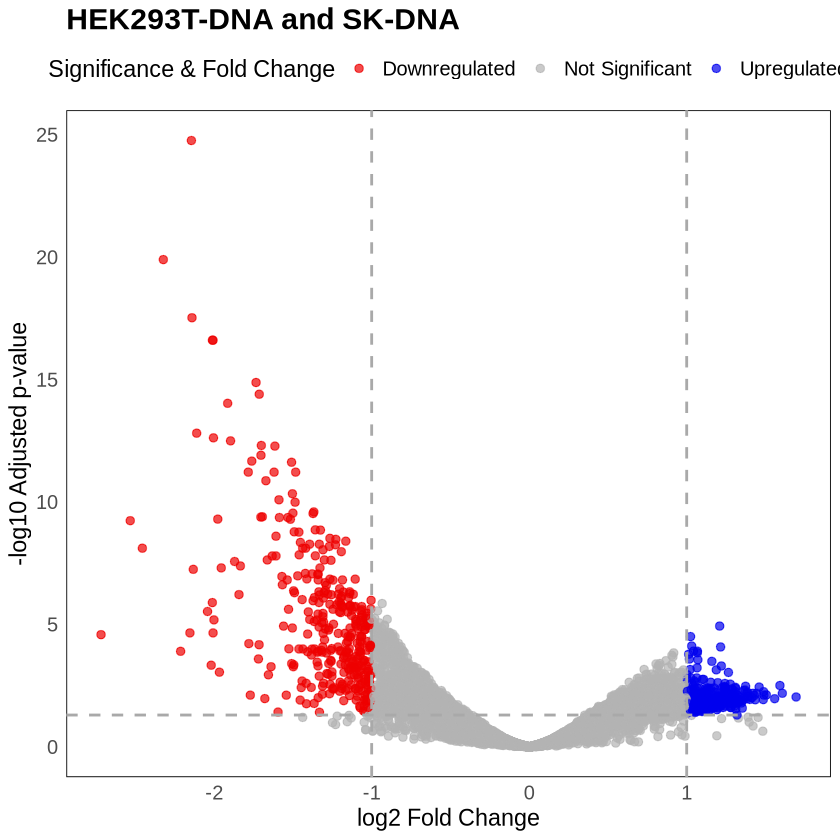

In [73]:
library(ggplot2)
library(dplyr)

# Create a new column 'color_group' based on log2FoldChange and padj
resdata <- resdata %>%
  mutate(color_group = case_when(
    log2FoldChange >= 1 & padj < 0.05 ~ 'Upregulated',     # Upregulated genes (log2FC >= 1, padj < 0.05)
    log2FoldChange <= -1 & padj < 0.05 ~ 'Downregulated',   # Downregulated genes (log2FC <= -1, padj < 0.05)
    TRUE ~ 'Not Significant'                                 # Not significant genes
  ))

# Print column names to identify the correct gene name column
print(colnames(resdata))

# Plotting the volcano plot
volcano_plot_pvalue <- ggplot(resdata, aes(x = log2FoldChange, y = -log10(padj))) +
  
  # Points colored by 'color_group'
  geom_point(aes(color = color_group), alpha = 0.7, size = 2) +
  
  # Define colors for upregulated, downregulated, and not significant
  scale_color_manual(values = c('Upregulated' = 'blue2', 'Downregulated' = 'red2', 'Not Significant' = 'gray70')) +
  
  # Add vertical and horizontal lines for fold-change and p-value cutoffs
  geom_vline(xintercept = c(-1, 1), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  geom_hline(yintercept = -log10(0.05), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  
  # Improve titles, axis labels, and legend
  labs(
    title = 'HEK293T-DNA and SK-DNA',
    x = 'log2 Fold Change',
    y = '-log10 Adjusted p-value',
    color = 'Significance & Fold Change'
  ) +
  
  # Theme adjustments for clarity
  theme_minimal() +
  theme(
    panel.grid = element_blank(),  # Remove grid lines
    panel.background = element_rect(color = 'black', fill = 'transparent'),
    plot.title = element_text(size = 18, face = 'bold'),  # Larger plot title
    axis.title.x = element_text(size = 14),  # X-axis title size
    axis.title.y = element_text(size = 14),  # Y-axis title size
    axis.text.x = element_text(size = 12),   # X-axis tick labels size
    axis.text.y = element_text(size = 12),   # Y-axis tick labels size
    legend.title = element_text(size = 14),  # Legend title size
    legend.text = element_text(size = 12),   # Legend text size
    legend.position = "top"                 # Legend at the top
  )

# Print the plot
print(volcano_plot_pvalue)


In [75]:
# Filter data for p-value < 0.05 and fold change <= -2
filtered_data <- resdata[resdata$padj < 0.05 & resdata$log2FoldChange >= 1, ]

# Count the number of rows that meet the conditions
num_significant <- nrow(filtered_data)

# Print the result
print(num_significant)

[1] 394


### Compare HEK-RNA and SK-RNA

In [1]:
# prepare metadata DataFrame
sample_info <- data.frame(
   sample = paste(rep(c("hek_r", "sk_r"), each = 3), 1:3, sep = ""),
   condition = rep(c("hek_r", "sk_r"), each = 3),
   row.names = paste(rep(c("hek_r", "sk_r"), each = 3), 1:3, sep = "")
)

In [2]:
# Load the necessary library
library(dplyr)
# Read the CSV file
counts <- read.csv("../counts_norm.csv")

# Select only columns from the third onward
numeric_data <- counts[, 3:ncol(counts)]

# Convert the numeric columns to integers (if needed after calculations)
numeric_data <- apply(numeric_data, 2, function(x) as.integer(x))

# Add back the first two columns (gene name and others)
data <- cbind(counts[, 1:2], numeric_data)

# drop columns 2:8
data1 <- data[, -c(15:16)]
selected_data <- data1[, c(2,6:8, 12:14)]

# View the selected columns
print(head(selected_data))
print(colnames(selected_data))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




                        Name hek.RNA1 hek.RNA2 hek.RNA3 sk.RNA1 sk.RNA2 sk.RNA3
1 AAGAB|ENST00000261880.10|1       61       61       71      40      41      47
2 AAGAB|ENST00000261880.10|2       61       64       81      45      46      40
3 AAGAB|ENST00000261880.10|3      178      184      189      84      83      86
4 AAGAB|ENST00000261880.10|4       48       56       65      36      33      27
5 AAGAB|ENST00000261880.10|5       79       91       96      60      58      52
6 AAGAB|ENST00000261880.10|6       82       82       79      51      50      58
[1] "Name"     "hek.RNA1" "hek.RNA2" "hek.RNA3" "sk.RNA1"  "sk.RNA2"  "sk.RNA3" 


In [3]:
mat <- selected_data[,-1]
rownames(mat) <- selected_data[,1]
head(mat)
dim(sample_info)

colnames(mat)
rownames(sample_info)

colnames(mat) <- rownames(sample_info)

colnames(mat)
rownames(sample_info)

,hek.RNA1,hek.RNA2,hek.RNA3,sk.RNA1,sk.RNA2,sk.RNA3
,<int>,<int>,<int>,<int>,<int>,<int>
AAGAB|ENST00000261880.10|1,61,61,71,40,41,47
AAGAB|ENST00000261880.10|2,61,64,81,45,46,40
AAGAB|ENST00000261880.10|3,178,184,189,84,83,86
AAGAB|ENST00000261880.10|4,48,56,65,36,33,27
AAGAB|ENST00000261880.10|5,79,91,96,60,58,52
AAGAB|ENST00000261880.10|6,82,82,79,51,50,58


[1] 6 2

[1] "hek.RNA1" "hek.RNA2" "hek.RNA3" "sk.RNA1"  "sk.RNA2"  "sk.RNA3"

[1] "hek_r1" "hek_r2" "hek_r3" "sk_r1"  "sk_r2"  "sk_r3"

[1] "hek_r1" "hek_r2" "hek_r3" "sk_r1"  "sk_r2"  "sk_r3"

[1] "hek_r1" "hek_r2" "hek_r3" "sk_r1"  "sk_r2"  "sk_r3"

In [4]:
# create the DESeqDataSet
library(DESeq2)

# Create a DESeqDataSet
dds <- DESeqDataSetFromMatrix(countData = mat,
                              colData = sample_info,
                              design = ~ condition)

Warning message:
“package ‘DESeq2’ was built under R version 4.4.2”
Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.4.2”
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
“package ‘BiocGenerics’ was built under R version 4.4.2”

Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Warning message:
“package ‘IRanges’ was built under R ve

In [5]:
# Run the differential expression analysis
dds <- DESeq(dds)

# Extract results
res <- results(dds)

# Write results to a CSV file
# write.csv(as.data.frame(res), "diff_expr_results_sk.csv")


dif_gene <- subset(res, padj < 0.05 & abs(log2FoldChange) >1 )
dim(dif_gene)
head(dif_gene)

resdata <- merge(as.data.frame(res), as.data.frame(counts(dds, normalize=TRUE)), by="row.names", sort=FALSE)

estimating size factors



estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] 2037    6

log2 fold change (MLE): condition sk r vs hek r 
Wald test p-value: condition sk r vs hek r 
DataFrame with 6 rows and 6 columns
                            baseMean log2FoldChange     lfcSE      stat
                           <numeric>      <numeric> <numeric> <numeric>
AAGAB|ENST00000261880.10|8  279.2375        2.06417  0.151407  13.63327
ABCC6|ENST00000205557.12|1  439.9251        1.28099  0.131409   9.74811
ABCC9|ENST00000261200.9|3    12.0162        1.97020  0.477828   4.12323
ABCC9|ENST00000261200.9|10   10.8064       -1.34055  0.496202  -2.70163
ABCD1|ENST00000218104.6|1   114.1290        1.31403  0.171281   7.67178
ABCD1|ENST00000218104.6|3   153.3044        1.10917  0.154489   7.17960
                                pvalue        padj
                             <numeric>   <numeric>
AAGAB|ENST00000261880.10|8 2.53959e-42 2.79355e-40
ABCC6|ENST00000205557.12|1 1.87935e-22 4.40957e-21
ABCC9|ENST00000261200.9|3  3.73589e-05 1.60177e-04
ABCC9|ENST00000261200.9|10 6.90010e-03 1

 [1] "Row.names"      "baseMean"       "log2FoldChange" "lfcSE"         
 [5] "stat"           "pvalue"         "padj"           "hek_r1"        
 [9] "hek_r2"         "hek_r3"         "sk_r1"          "sk_r2"         
[13] "sk_r3"          "color_group"   


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


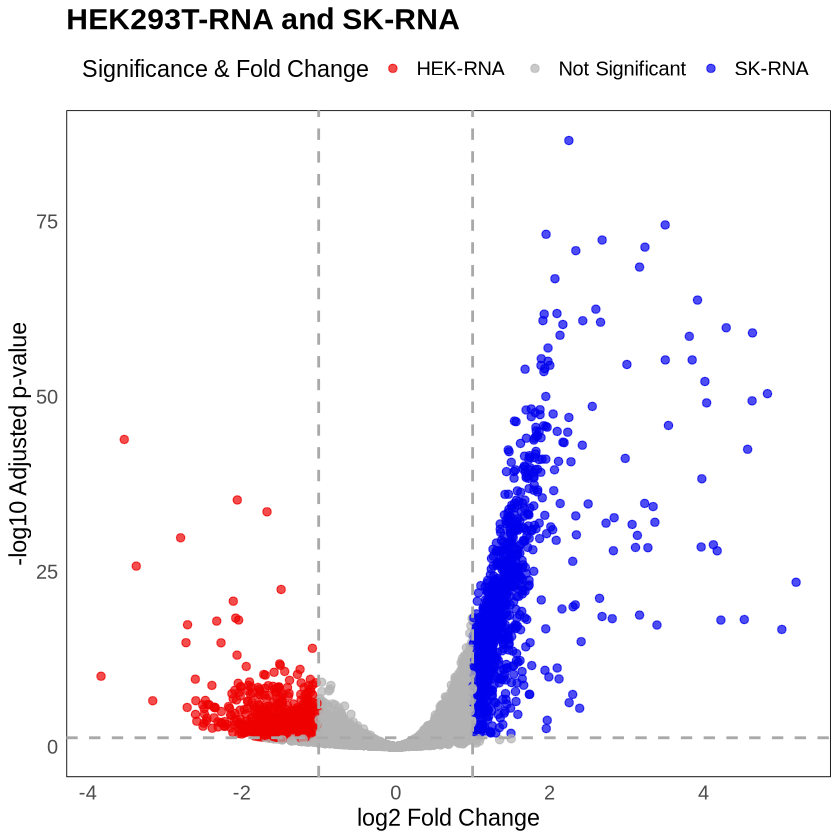

In [6]:
library(ggplot2)
library(dplyr)

# Create a new column 'color_group' based on log2FoldChange and padj
resdata <- resdata %>%
  mutate(color_group = case_when(
    log2FoldChange >= 1 & padj < 0.05 ~ 'SK-RNA',     # Upregulated genes (log2FC >= 1, padj < 0.05)
    log2FoldChange <= -1 & padj < 0.05 ~ 'HEK-RNA',   # Downregulated genes (log2FC <= -1, padj < 0.05)
    TRUE ~ 'Not Significant'                                 # Not significant genes
  ))

# Print column names to identify the correct gene name column
print(colnames(resdata))

# Plotting the volcano plot
volcano_plot_pvalue <- ggplot(resdata, aes(x = log2FoldChange, y = -log10(padj))) +
  
  # Points colored by 'color_group'
  geom_point(aes(color = color_group), alpha = 0.7, size = 2) +
  
  # Define colors for upregulated, downregulated, and not significant
  scale_color_manual(values = c('SK-RNA' = 'blue2', 'HEK-RNA' = 'red2', 'Not Significant' = 'gray70')) +
  
  # Add vertical and horizontal lines for fold-change and p-value cutoffs
  geom_vline(xintercept = c(-1, 1), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  geom_hline(yintercept = -log10(0.05), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  
  # Improve titles, axis labels, and legend
  labs(
    title = 'HEK293T-RNA and SK-RNA',
    x = 'log2 Fold Change',
    y = '-log10 Adjusted p-value',
    color = 'Significance & Fold Change'
  ) +
  
  # Theme adjustments for clarity
  theme_minimal() +
  theme(
    panel.grid = element_blank(),  # Remove grid lines
    panel.background = element_rect(color = 'black', fill = 'transparent'),
    plot.title = element_text(size = 18, face = 'bold'),  # Larger plot title
    axis.title.x = element_text(size = 14),  # X-axis title size
    axis.title.y = element_text(size = 14),  # Y-axis title size
    axis.text.x = element_text(size = 12),   # X-axis tick labels size
    axis.text.y = element_text(size = 12),   # Y-axis tick labels size
    legend.title = element_text(size = 14),  # Legend title size
    legend.text = element_text(size = 12),   # Legend text size
    legend.position = "top"                 # Legend at the top
  )

# Print the plot
print(volcano_plot_pvalue)


In [8]:
# Filter data for p-value < 0.05 and fold change <= -2
filtered_data <- resdata[resdata$padj < 0.05 & resdata$log2FoldChange <= -1, ]

# Count the number of rows that meet the conditions
num_significant <- nrow(filtered_data)

# Print the result
print(num_significant)

[1] 908


## Compare HEK293T-gDNA with ASO-lib

In [41]:
# prepare metadata DataFrame
sample_info <- data.frame(
   sample = paste(rep(c("hek_g", "ASO-lib"), each = 2), 1:2, sep = ""),
   condition = rep(c("hek_g", "ASO-lib"), each = 2),
   row.names = paste(rep(c("hek_g", "ASO-lib"), each = 2), 1:2, sep = "")
)

In [42]:
# Load the necessary library
library(dplyr)
# Read the CSV file
counts <- read.csv("../counts_norm.csv")

# Select only columns from the third onward
numeric_data <- counts[, 3:ncol(counts)]

# Convert the numeric columns to integers (if needed after calculations)
numeric_data <- apply(numeric_data, 2, function(x) as.integer(x))

# Add back the first two columns (gene name and others)
data <- cbind(counts[, 1:2], numeric_data)

# Select columns
selected_data <- data[, c(2:4, 15:16)]

# View the selected columns
print(head(selected_data))
print(colnames(selected_data))

                        Name hek.gDNA1 hek.gDNA2 aso.lib1 aso.lib2
1 AAGAB|ENST00000261880.10|1        77        73       62       60
2 AAGAB|ENST00000261880.10|2        57        55       69       66
3 AAGAB|ENST00000261880.10|3       129       133      163      158
4 AAGAB|ENST00000261880.10|4        49        47       42       42
5 AAGAB|ENST00000261880.10|5        85        82       64       62
6 AAGAB|ENST00000261880.10|6        92        92      107      105
[1] "Name"      "hek.gDNA1" "hek.gDNA2" "aso.lib1"  "aso.lib2" 


In [53]:
mat <- selected_data[,-1]
rownames(mat) <- selected_data[,1]
head(mat)
dim(sample_info)

,hek.gDNA1,hek.gDNA2,aso.lib1,aso.lib2
,<int>,<int>,<int>,<int>
AAGAB|ENST00000261880.10|1,77,73,62,60
AAGAB|ENST00000261880.10|2,57,55,69,66
AAGAB|ENST00000261880.10|3,129,133,163,158
AAGAB|ENST00000261880.10|4,49,47,42,42
AAGAB|ENST00000261880.10|5,85,82,64,62
AAGAB|ENST00000261880.10|6,92,92,107,105


[1] 4 2

In [44]:
colnames(mat)
rownames(sample_info)

[1] "hek.gDNA1" "hek.gDNA2" "aso.lib1"  "aso.lib2"

[1] "hek_g1"   "hek_g2"   "ASO-lib1" "ASO-lib2"

In [45]:
colnames(mat) <- rownames(sample_info)

In [46]:
colnames(mat)
rownames(sample_info)

[1] "hek_g1"   "hek_g2"   "ASO-lib1" "ASO-lib2"

[1] "hek_g1"   "hek_g2"   "ASO-lib1" "ASO-lib2"

In [47]:
# create the DESeqDataSet
library(DESeq2)

# Create a DESeqDataSet
dds <- DESeqDataSetFromMatrix(countData = mat,
                              colData = sample_info,
                              design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [48]:
dds <- DESeq(dds)

# Extract results
res <- results(dds)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and t

In [49]:
dif_gene <- subset(res, padj < 0.05 & abs(log2FoldChange) >1 )
dim(dif_gene)
head(dif_gene)

[1] 1291    6

log2 fold change (MLE): condition hek g vs ASO.lib 
Wald test p-value: condition hek g vs ASO.lib 
DataFrame with 6 rows and 6 columns
                             baseMean log2FoldChange     lfcSE      stat
                            <numeric>      <numeric> <numeric> <numeric>
AAGAB|ENST00000261880.10|10   61.3099       -1.08886  0.376997  -2.88826
ABCA4|ENST00000370225.4|1     97.0200       -1.13729  0.318661  -3.56896
ABCC6|ENST00000205557.12|1   262.2929       -1.70532  0.280377  -6.08225
ABCD1|ENST00000218104.6|1     67.1852       -1.18546  0.364623  -3.25119
ABCD1|ENST00000218104.6|2     81.0338       -1.78382  0.349634  -5.10197
ABCD1|ENST00000218104.6|3    126.5405       -1.24126  0.306368  -4.05152
                                 pvalue        padj
                              <numeric>   <numeric>
AAGAB|ENST00000261880.10|10 3.87385e-03 2.24367e-02
ABCA4|ENST00000370225.4|1   3.58401e-04 3.44353e-03
ABCC6|ENST00000205557.12|1  1.18505e-09 1.35154e-07
ABCD1|ENST00000218104

In [50]:
resdata <- merge(as.data.frame(res), as.data.frame(counts(dds, normalize=FALSE)), by="row.names", sort=FALSE)

 [1] "Row.names"      "baseMean"       "log2FoldChange" "lfcSE"         
 [5] "stat"           "pvalue"         "padj"           "hek_g1"        
 [9] "hek_g2"         "ASO-lib1"       "ASO-lib2"       "color_group"   


Warning message:
“Removed 992 rows containing missing values or values outside the scale range
(`geom_point()`).”


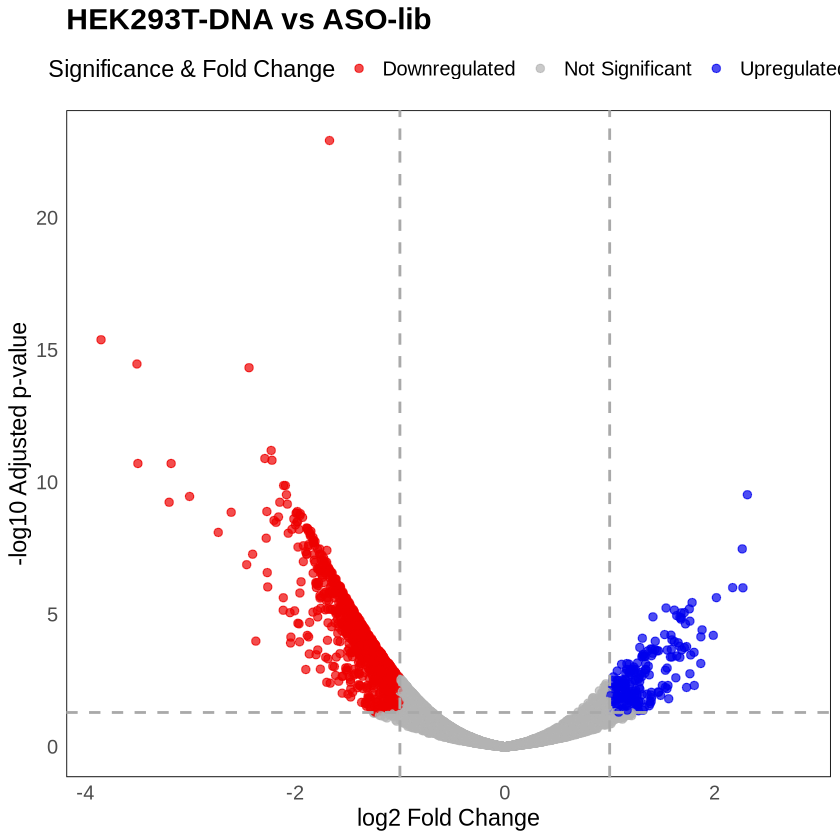

In [51]:
library(ggplot2)
library(dplyr)

# Create a new column 'color_group' based on log2FoldChange and padj
resdata <- resdata %>%
  mutate(color_group = case_when(
    log2FoldChange >= 1 & padj < 0.05 ~ 'Upregulated',     # Upregulated genes (log2FC >= 1, padj < 0.05)
    log2FoldChange <= -1 & padj < 0.05 ~ 'Downregulated',   # Downregulated genes (log2FC <= -1, padj < 0.05)
    TRUE ~ 'Not Significant'                                 # Not significant genes
  ))

# Print column names to identify the correct gene name column
print(colnames(resdata))

# Plotting the volcano plot
volcano_plot_pvalue <- ggplot(resdata, aes(x = log2FoldChange, y = -log10(padj))) +
  
  # Points colored by 'color_group'
  geom_point(aes(color = color_group), alpha = 0.7, size = 2) +
  
  # Define colors for upregulated, downregulated, and not significant
  scale_color_manual(values = c('Upregulated' = 'blue2', 'Downregulated' = 'red2', 'Not Significant' = 'gray70')) +
  
  # Add vertical and horizontal lines for fold-change and p-value cutoffs
  geom_vline(xintercept = c(-1, 1), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  geom_hline(yintercept = -log10(0.05), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  
  # Improve titles, axis labels, and legend
  labs(
    title = 'HEK293T-DNA vs ASO-lib',
    x = 'log2 Fold Change',
    y = '-log10 Adjusted p-value',
    color = 'Significance & Fold Change'
  ) +
  
  # Theme adjustments for clarity
  theme_minimal() +
  theme(
    panel.grid = element_blank(),  # Remove grid lines
    panel.background = element_rect(color = 'black', fill = 'transparent'),
    plot.title = element_text(size = 18, face = 'bold'),  # Larger plot title
    axis.title.x = element_text(size = 14),  # X-axis title size
    axis.title.y = element_text(size = 14),  # Y-axis title size
    axis.text.x = element_text(size = 12),   # X-axis tick labels size
    axis.text.y = element_text(size = 12),   # Y-axis tick labels size
    legend.title = element_text(size = 14),  # Legend title size
    legend.text = element_text(size = 12),   # Legend text size
    legend.position = "top"                 # Legend at the top
  )

# Print the plot
print(volcano_plot_pvalue)

In [52]:
# Filter data for p-value < 0.05 and fold change <= -2
filtered_data <- resdata[resdata$padj < 0.05 & resdata$log2FoldChange <= -1, ]

# Count the number of rows that meet the conditions
num_significant <- nrow(filtered_data)

# Print the result
print(num_significant)

[1] 1114


In [56]:
# prepare metadata DataFrame
sample_info <- data.frame(
   sample = paste(rep(c("sk_g", "ASO-lib"), each = 2), 1:2, sep = ""),
   condition = rep(c("sk_g", "ASO-lib"), each = 2),
   row.names = paste(rep(c("sk_g", "ASO-lib"), each = 2), 1:2, sep = "")
)

In [57]:
# Load the necessary library
library(dplyr)
# Read the CSV file
counts <- read.csv("../counts_norm.csv")

# Select only columns from the third onward
numeric_data <- counts[, 3:ncol(counts)]

# Convert the numeric columns to integers (if needed after calculations)
numeric_data <- apply(numeric_data, 2, function(x) as.integer(x))

# Add back the first two columns (gene name and others)
data <- cbind(counts[, 1:2], numeric_data)

# Select columns
selected_data <- data[, c(2,6:7, 15:16)]

# View the selected columns
print(head(selected_data))
print(colnames(selected_data))

                        Name hek.RNA1 hek.RNA2 aso.lib1 aso.lib2
1 AAGAB|ENST00000261880.10|1       61       61       62       60
2 AAGAB|ENST00000261880.10|2       61       64       69       66
3 AAGAB|ENST00000261880.10|3      178      184      163      158
4 AAGAB|ENST00000261880.10|4       48       56       42       42
5 AAGAB|ENST00000261880.10|5       79       91       64       62
6 AAGAB|ENST00000261880.10|6       82       82      107      105
[1] "Name"     "hek.RNA1" "hek.RNA2" "aso.lib1" "aso.lib2"


In [58]:
mat <- selected_data[,-1]
rownames(mat) <- selected_data[,1]
head(mat)
dim(sample_info)

colnames(mat)
rownames(sample_info)
colnames(mat) <- rownames(sample_info)

,hek.RNA1,hek.RNA2,aso.lib1,aso.lib2
,<int>,<int>,<int>,<int>
AAGAB|ENST00000261880.10|1,61,61,62,60
AAGAB|ENST00000261880.10|2,61,64,69,66
AAGAB|ENST00000261880.10|3,178,184,163,158
AAGAB|ENST00000261880.10|4,48,56,42,42
AAGAB|ENST00000261880.10|5,79,91,64,62
AAGAB|ENST00000261880.10|6,82,82,107,105


[1] 4 2

[1] "hek.RNA1" "hek.RNA2" "aso.lib1" "aso.lib2"

[1] "sk_g1"    "sk_g2"    "ASO-lib1" "ASO-lib2"

In [59]:
colnames(mat)
rownames(sample_info)

[1] "sk_g1"    "sk_g2"    "ASO-lib1" "ASO-lib2"

[1] "sk_g1"    "sk_g2"    "ASO-lib1" "ASO-lib2"

In [60]:
# create the DESeqDataSet
library(DESeq2)

# Create a DESeqDataSet
dds <- DESeqDataSetFromMatrix(countData = mat,
                              colData = sample_info,
                              design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [61]:
dds <- DESeq(dds)

# Extract results
res <- results(dds)

dif_gene <- subset(res, padj < 0.05 & abs(log2FoldChange) >1 )
dim(dif_gene)
head(dif_gene)

resdata <- merge(as.data.frame(res), as.data.frame(counts(dds, normalize=FALSE)), by="row.names", sort=FALSE)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing



[1] 1796    6

log2 fold change (MLE): condition sk g vs ASO.lib 
Wald test p-value: condition sk g vs ASO.lib 
DataFrame with 6 rows and 6 columns
                             baseMean log2FoldChange     lfcSE      stat
                            <numeric>      <numeric> <numeric> <numeric>
AAGAB|ENST00000261880.10|9    98.7221       -1.23661  0.300569  -4.11424
AAGAB|ENST00000261880.10|14   32.4031       -3.10015  0.585120  -5.29831
ABCC9|ENST00000261200.9|3     15.3634       -1.97012  0.728207  -2.70544
ABCC9|ENST00000261200.9|10    36.5091       -1.42803  0.464340  -3.07539
ABCC9|ENST00000261200.9|17    44.5673       -2.76192  0.481203  -5.73962
ACSL4|ENST00000672401.1|8     29.8082       -1.69653  0.518321  -3.27314
                                 pvalue        padj
                              <numeric>   <numeric>
AAGAB|ENST00000261880.10|9  3.88458e-05 4.17869e-04
AAGAB|ENST00000261880.10|14 1.16879e-07 3.51669e-06
ABCC9|ENST00000261200.9|3   6.82133e-03 2.85174e-02
ABCC9|ENST00000261200.9

 [1] "Row.names"      "baseMean"       "log2FoldChange" "lfcSE"         
 [5] "stat"           "pvalue"         "padj"           "sk_g1"         
 [9] "sk_g2"          "ASO-lib1"       "ASO-lib2"       "color_group"   


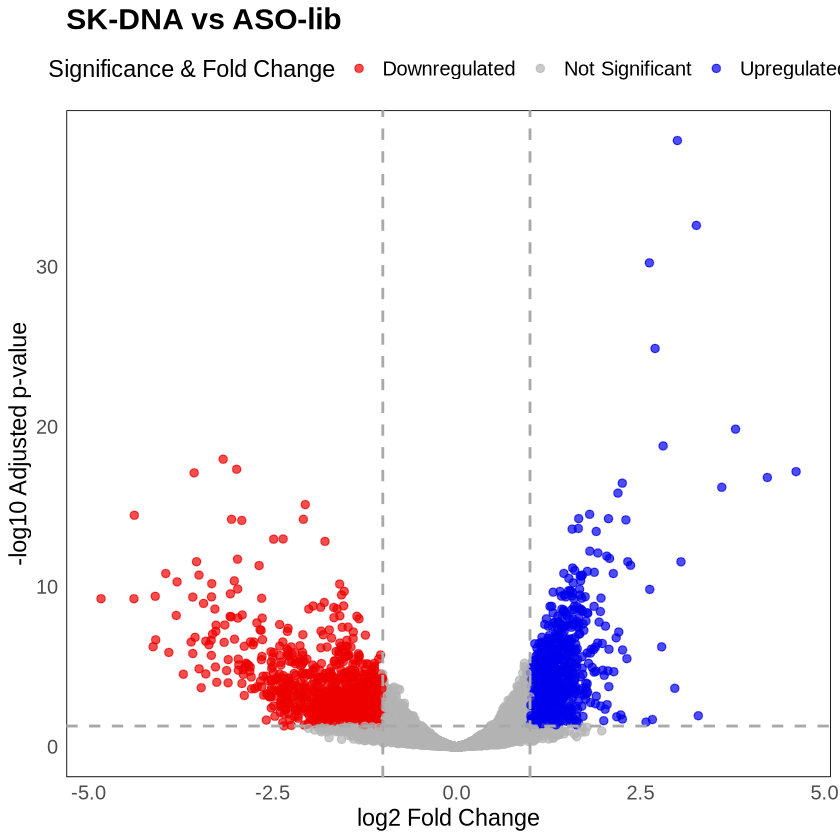

In [62]:
library(ggplot2)
library(dplyr)

# Create a new column 'color_group' based on log2FoldChange and padj
resdata <- resdata %>%
  mutate(color_group = case_when(
    log2FoldChange >= 1 & padj < 0.05 ~ 'Upregulated',     # Upregulated genes (log2FC >= 1, padj < 0.05)
    log2FoldChange <= -1 & padj < 0.05 ~ 'Downregulated',   # Downregulated genes (log2FC <= -1, padj < 0.05)
    TRUE ~ 'Not Significant'                                 # Not significant genes
  ))

# Print column names to identify the correct gene name column
print(colnames(resdata))

# Plotting the volcano plot
volcano_plot_pvalue <- ggplot(resdata, aes(x = log2FoldChange, y = -log10(padj))) +
  
  # Points colored by 'color_group'
  geom_point(aes(color = color_group), alpha = 0.7, size = 2) +
  
  # Define colors for upregulated, downregulated, and not significant
  scale_color_manual(values = c('Upregulated' = 'blue2', 'Downregulated' = 'red2', 'Not Significant' = 'gray70')) +
  
  # Add vertical and horizontal lines for fold-change and p-value cutoffs
  geom_vline(xintercept = c(-1, 1), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  geom_hline(yintercept = -log10(0.05), color = 'darkgray', linetype = 'dashed', size = 0.8) +
  
  # Improve titles, axis labels, and legend
  labs(
    title = 'SK-DNA vs ASO-lib',
    x = 'log2 Fold Change',
    y = '-log10 Adjusted p-value',
    color = 'Significance & Fold Change'
  ) +
  
  # Theme adjustments for clarity
  theme_minimal() +
  theme(
    panel.grid = element_blank(),  # Remove grid lines
    panel.background = element_rect(color = 'black', fill = 'transparent'),
    plot.title = element_text(size = 18, face = 'bold'),  # Larger plot title
    axis.title.x = element_text(size = 14),  # X-axis title size
    axis.title.y = element_text(size = 14),  # Y-axis title size
    axis.text.x = element_text(size = 12),   # X-axis tick labels size
    axis.text.y = element_text(size = 12),   # Y-axis tick labels size
    legend.title = element_text(size = 14),  # Legend title size
    legend.text = element_text(size = 12),   # Legend text size
    legend.position = "top"                 # Legend at the top
  )

# Print the plot
print(volcano_plot_pvalue)

In [64]:
# Filter data for p-value < 0.05 and fold change <= -2
filtered_data <- resdata[resdata$padj < 0.05 & resdata$log2FoldChange >= 1, ]

# Count the number of rows that meet the conditions
num_significant <- nrow(filtered_data)

# Print the result
print(num_significant)

[1] 844


                        Name hek.RNA1 hek.RNA2 hek.RNA3 sk.RNA1 sk.RNA2 sk.RNA3
1 AAGAB|ENST00000261880.10|1     2265     2164     2430    1660    1599    2036
2 AAGAB|ENST00000261880.10|2     2267     2269     2796    1891    1828    1708
3 AAGAB|ENST00000261880.10|3     6560     6474     6490    3490    3270    3675
4 AAGAB|ENST00000261880.10|4     1797     1965     2236    1500    1300    1170
5 AAGAB|ENST00000261880.10|5     2910     3202     3289    2491    2280    2227
6 AAGAB|ENST00000261880.10|6     3038     2896     2727    2115    1956    2473
[1] "Name"     "hek.RNA1" "hek.RNA2" "hek.RNA3" "sk.RNA1"  "sk.RNA2"  "sk.RNA3" 


,hek.RNA1,hek.RNA2,hek.RNA3,sk.RNA1,sk.RNA2,sk.RNA3
,<int>,<int>,<int>,<int>,<int>,<int>
AAGAB|ENST00000261880.10|1,2265,2164,2430,1660,1599,2036
AAGAB|ENST00000261880.10|2,2267,2269,2796,1891,1828,1708
AAGAB|ENST00000261880.10|3,6560,6474,6490,3490,3270,3675
AAGAB|ENST00000261880.10|4,1797,1965,2236,1500,1300,1170
AAGAB|ENST00000261880.10|5,2910,3202,3289,2491,2280,2227
AAGAB|ENST00000261880.10|6,3038,2896,2727,2115,1956,2473


[1] 6 2

[1] "hek.RNA1" "hek.RNA2" "hek.RNA3" "sk.RNA1"  "sk.RNA2"  "sk.RNA3"

[1] "hek_r1" "hek_r2" "hek_r3" "sk_r1"  "sk_r2"  "sk_r3"

[1] "hek_r1" "hek_r2" "hek_r3" "sk_r1"  "sk_r2"  "sk_r3"

[1] "hek_r1" "hek_r2" "hek_r3" "sk_r1"  "sk_r2"  "sk_r3"

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] 3099    6

log2 fold change (MLE): condition sk r vs hek r 
Wald test p-value: condition sk r vs hek r 
DataFrame with 6 rows and 6 columns
                            baseMean log2FoldChange     lfcSE      stat
                           <numeric>      <numeric> <numeric> <numeric>
AAGAB|ENST00000261880.10|8 10882.146        2.16886  0.120890  17.94074
ABCC6|ENST00000205557.12|1 17009.735        1.38985  0.119072  11.67236
ABCC9|ENST00000261200.9|3    485.211        2.05073  0.153725  13.34027
ABCC9|ENST00000261200.9|4    186.085       -1.68481  0.180196  -9.34986
ABCC9|ENST00000261200.9|10   423.635       -1.10035  0.134227  -8.19772
ABCC9|ENST00000261200.9|13   428.441       -2.64879  0.194888 -13.59132
                                pvalue        padj
                             <numeric>   <numeric>
AAGAB|ENST00000261880.10|8 5.66998e-72 6.92663e-70
ABCC6|ENST00000205557.12|1 1.76467e-31 2.12328e-30
ABCC9|ENST00000261200.9|3  1.34969e-40 2.81507e-39
ABCC9|ENST00000261200.9|4  8.77599e-21 5

 Factor w/ 4 levels "p >= 0.05, FC < 2",..: 1 1 2 1 1 1 4 4 4 2 ...



 p >= 0.05, FC < 2   p < 0.05, FC < 2 p >= 0.05, FC >= 2  p < 0.05, FC >= 2 
              2637               2396                210               6729 

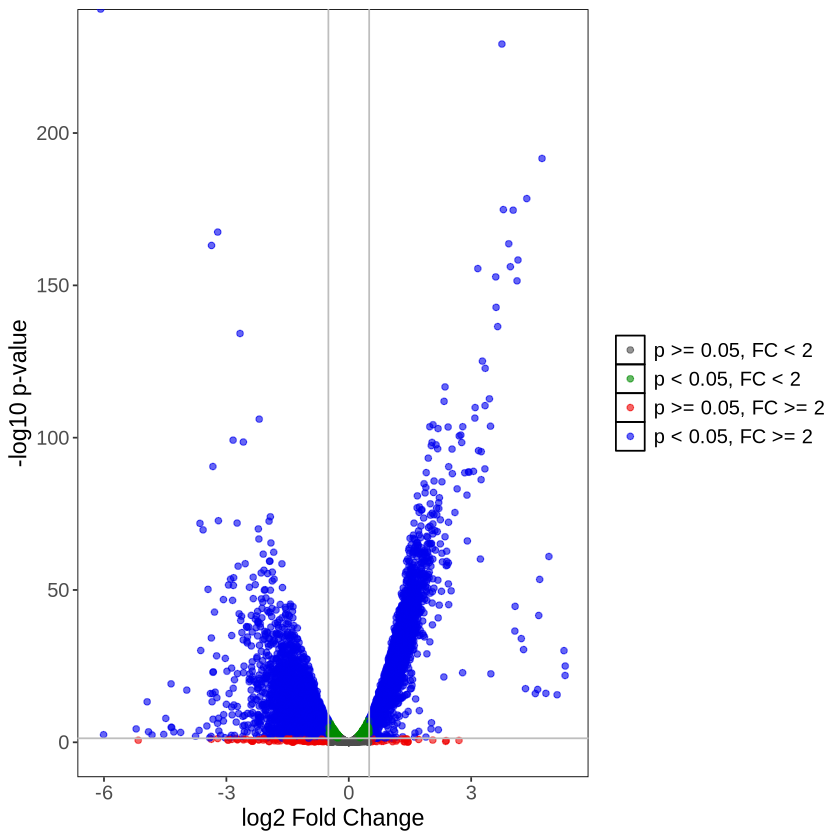

In [ ]:
# prepare metadata DataFrame
sample_info <- data.frame(
   sample = paste(rep(c("hek_r", "sk_r"), each = 3), 1:3, sep = ""),
   condition = rep(c("hek_r", "sk_r"), each = 3),
   row.names = paste(rep(c("hek_r", "sk_r"), each = 3), 1:3, sep = "")
)

# Load the data
data <- read.csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/counts-aso.csv")

# drop columns 2:8
data1 <- data[, -c(15:16)]
selected_data <- data1[, c(2,6:8, 12:14)]

# View the selected columns
print(head(selected_data))
print(colnames(selected_data))

mat <- selected_data[,-1]
rownames(mat) <- selected_data[,1]
head(mat)
dim(sample_info)

colnames(mat)
rownames(sample_info)

colnames(mat) <- rownames(sample_info)

colnames(mat)
rownames(sample_info)

# create the DESeqDataSet
library(DESeq2)

# Create a DESeqDataSet
dds <- DESeqDataSetFromMatrix(countData = mat,
                              colData = sample_info,
                              design = ~ condition)

# Run the differential expression analysis
dds <- DESeq(dds)

# Extract results
res <- results(dds)

# Write results to a CSV file
# write.csv(as.data.frame(res), "diff_expr_results_sk.csv")


dif_gene <- subset(res, padj < 0.05 & abs(log2FoldChange) >1 )
dim(dif_gene)
head(dif_gene)

resdata <- merge(as.data.frame(res), as.data.frame(counts(dds, normalize=TRUE)), by="row.names", sort=FALSE)
write.table(resdata, file = "DESeq2_GROUp_genes_sk.txt", sep = '\t', quote=F, row.names = F)


# Assuming 'log2FoldChange' and 'padj' are the columns of interest
# First, we need to check for NAs and handle them appropriately
resdata <- resdata[!is.na(resdata$padj) & !is.na(resdata$log2FoldChange),]

# Recreate the select_change and select_pvalue columns with correct logic
resdata$select_change <- ifelse(abs(resdata$log2FoldChange) >= 0.5, 'y', 'n')
resdata$select_pvalue <- ifelse(resdata$padj < 0.05, 'y', 'n')

# Combine the above columns into a single 'select' column
resdata$select <- paste(resdata$select_change, resdata$select_pvalue, sep = '')

# Define factor levels and labels
resdata$select <- factor(resdata$select, levels = c('nn', 'ny', 'yn', 'yy'),
                         labels = c('p >= 0.05, FC < 2', 'p < 0.05, FC < 2', 'p >= 0.05, FC >= 2', 'p < 0.05, FC >= 2'))

# Check the structure of 'select'
str(resdata$select)

# Check the actual contents and distribution of 'select'
table(resdata$select)

library(ggplot2)

# Plotting to check the correct color assignment
volcano_plot_pvalue <- ggplot(resdata, aes(log2FoldChange, -log10(padj))) +
  geom_point(aes(color = select), alpha = 0.6) +
  scale_color_manual(values = c('gray30', 'green4', 'red2', 'blue2')) +
  theme(panel.grid = element_blank(),
        panel.background = element_rect(color = 'black', fill = 'transparent'),
        legend.title = element_blank(),
        legend.key = element_rect(fill = 'transparent'),
        legend.background = element_rect(fill = 'transparent'),
        axis.title.x = element_text(size = 14),  # X-axis title size
        axis.title.y = element_text(size = 14),  # Y-axis title size
        axis.text.x = element_text(size = 12),    # X-axis tick labels size
        axis.text.y = element_text(size = 12),    # Y-axis tick labels size
        plot.title = element_text(size = 16, face = 'bold'),  # Plot title size
        legend.text = element_text(size = 12)) +  # Legend text size
  geom_vline(xintercept = c(-0.5, 0.5), color = 'gray', linewidth = 0.5) +
  geom_hline(yintercept = -log10(0.05), color = 'gray', linewidth = 0.5) +
  labs(x = 'log2 Fold Change', y = '-log10 p-value')

print(volcano_plot_pvalue)


,count,condition,gene_id
,<dbl>,<fct>,<chr>
hek_r1,2.176466,hek_r,MECP2|ENST00000453960.7|63
hek_r2,2.220001,hek_r,MECP2|ENST00000453960.7|63
hek_r3,2.997159,hek_r,MECP2|ENST00000453960.7|63
sk_r1,5.105548,sk_r,MECP2|ENST00000453960.7|63
sk_r2,4.143887,sk_r,MECP2|ENST00000453960.7|63
sk_r3,2.856926,sk_r,MECP2|ENST00000453960.7|63


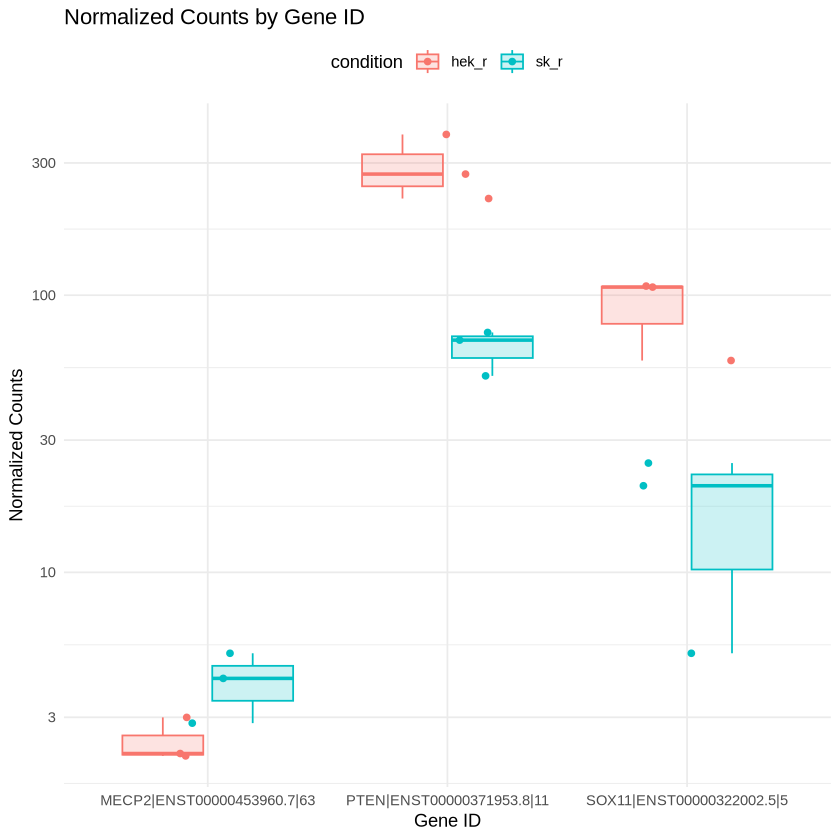

In [41]:
library(DESeq2)
library(ggplot2)

# Define the genes of interest
genes_of_interest <- c("MECP2|ENST00000453960.7|63", "PTEN|ENST00000371953.8|11", "SOX11|ENST00000322002.5|5")

# Initialize an empty data frame to store results
all_counts <- data.frame()

# Loop through genes and extract counts
for (gene in genes_of_interest) {
  gene_data <- plotCounts(dds, gene = gene, intgroup = "condition", returnData = TRUE)
  gene_data$gene_id <- gene  # Add a column for gene IDs
  all_counts <- rbind(all_counts, gene_data)  # Combine data
}

# View the combined data
head(all_counts)

# Plot using ggplot2
ggplot(all_counts, aes(x = gene_id, y = count, color = condition)) +
  geom_jitter(width = 0.2, height = 0) +
  geom_boxplot(aes(fill = condition), alpha = 0.2, outlier.shape = NA) +
  scale_y_log10() +  # Log scale for better visualization
  labs(title = "Normalized Counts by Gene ID",
       x = "Gene ID",
       y = "Normalized Counts") +
  theme_minimal() +
  theme(legend.position = "top")